In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/gauravduttakiit/white-wine-quality의 데이터 사용

train = pd.read_csv('Training_set_whitewine.csv')
test = pd.read_csv("Testing_set_whitewine.csv")


<Axes: ylabel='Count'>

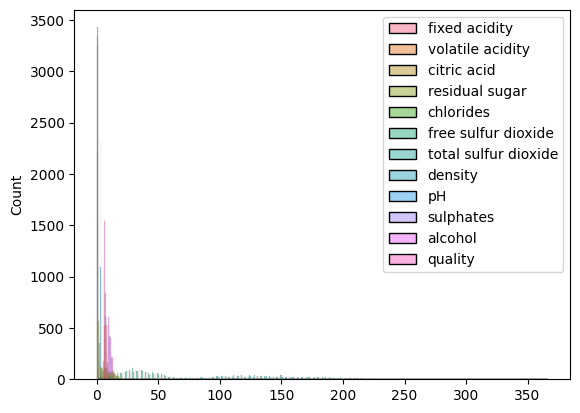

In [8]:
sns.histplot(train)

fixed acidity          -0.097323
volatile acidity       -0.204802
citric acid            -0.007343
residual sugar         -0.097507
chlorides              -0.207546
free sulfur dioxide     0.015134
total sulfur dioxide   -0.181410
density                -0.311180
pH                      0.098298
sulphates               0.052200
alcohol                 0.437261
quality                 1.000000
dtype: float64


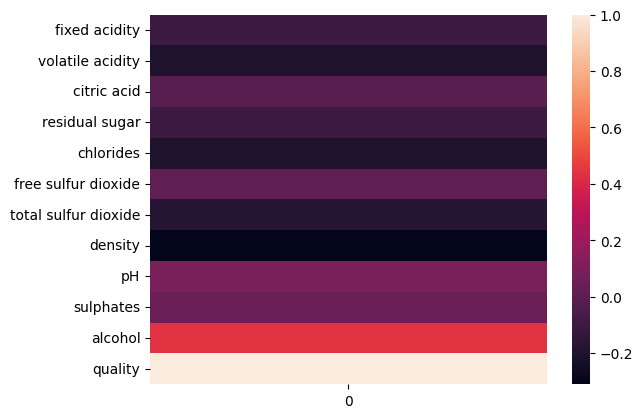

In [ ]:
#퀄리티와 다른변수 간의 상관관계
train.corrwith(train['quality'])
tc = train.corrwith(train['quality'])
print(tc)
#품질점수와 가장 밀접한 상관관계를 갖는 변수는 alcohol

#히트맵 그리기
sns.heatmap(tc.to_frame())
plt.show()

In [ ]:
#학습 데이터와 검증 데이터 분할
X=train.drop(['quality'], axis=1)
y=train['quality']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)


In [15]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#모델 생성
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

#모델 훈련
rfr_model.fit(X_train, y_train)

#예측
y_pred_rfr = rfr_model.predict(X_val)

#성능평가
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(mean_squared_error(y_val, y_pred_rfr))
print(mean_absolute_error(y_val, y_pred_rfr))
print(r2_score(y_val, y_pred_rfr))

0.4261604956268221
0.4665451895043732
0.45867678525156563


In [16]:
#LinearRegression 선형회귀모델
from sklearn.linear_model import LinearRegression

#LinearRegression 모델 생성
lr_model = LinearRegression()

#모델 학습
lr_model.fit(X_train, y_train)

#모델 예측
y_pred_lr = lr_model.predict(X_val)

#성능 검사
print(mean_squared_error(y_val, y_pred_lr))
print(mean_absolute_error(y_val, y_pred_lr))
print(r2_score(y_val, y_pred_lr))

0.5665610461040568
0.5792611494044424
0.28033534319697506


In [ ]:
#품질점수 >= 6 : Good, < 6 : Not Good 인 quality_label이라는 항목을 추가
train['quality_label'] = train['quality'].apply(lambda x : 'Good' if x>=6 else 'Not Good')


# 새로운 훈련 데이터와 테스트 네이터 분할
w=train.drop(['quality', 'quality_label'], axis=1)
z=train['quality_label']

w_train, w_val, z_train, z_val = train_test_split(w,z, test_size=0.2, random_state=42)

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#모델 생성
rfc_model = RandomForestClassifier()

#모델 학습
rfc_model.fit(w_train, z_train)

#예측
z_pred_rfc = rfc_model.predict(w_val)

#분류 모델 성능평가
from sklearn.metrics import classification_report

print(classification_report(z_val, z_pred_rfc))

              precision    recall  f1-score   support

        Good       0.84      0.91      0.88       470
    Not Good       0.77      0.63      0.69       216

    accuracy                           0.82       686
   macro avg       0.81      0.77      0.78       686
weighted avg       0.82      0.82      0.82       686



레드와인과의 차이

가장 높은 상관관계 변수가 alcohol